In [1]:
%matplotlib inline
import numpy as np
from numpy.linalg import norm

import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec

from sklearn.metrics.pairwise import cosine_distances
from sklearn.neighbors import NearestNeighbors

In [2]:
X = np.random.randn(5, 5)
X

array([[ 0.52965293, -1.76027946, -0.31081452,  0.83687119, -0.83997736],
       [ 2.66113047, -1.05463163,  0.87829979, -1.20377784,  0.23996654],
       [ 0.11389447,  0.23765809,  0.75768022, -0.25122917, -0.84012338],
       [-0.01603584,  0.60592382, -0.11249582,  0.915997  , -0.47129911],
       [-1.21523772,  0.04518549, -0.32663138,  0.11286425, -0.57218883]])

In [3]:
distances = cosine_distances(X)
distances

array([[0.        , 0.75048948, 1.03735168, 0.95388108, 1.01519663],
       [0.75048948, 0.        , 0.78711522, 1.51385019, 1.85547772],
       [1.03735168, 0.78711522, 0.        , 0.84386787, 0.95318869],
       [0.95388108, 1.51385019, 0.84386787, 0.        , 0.72587954],
       [1.01519663, 1.85547772, 0.95318869, 0.72587954, 0.        ]])

In [4]:
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        print(1 - np.dot(X[i], X[j]) / (norm(X[i]) * norm(X[j])), end = ' ')
    print()

2.220446049250313e-16 0.7504894786880031 1.0373516750737644 0.9538810797736511 1.0151966273573987 
0.7504894786880031 0.0 0.7871152168105364 1.5138501902001351 1.8554777204521073 
1.0373516750737644 0.7871152168105364 -2.220446049250313e-16 0.843867867918866 0.9531886928756521 
0.9538810797736511 1.5138501902001351 0.843867867918866 0.0 0.7258795422864047 
1.0151966273573987 1.8554777204521073 0.9531886928756521 0.7258795422864047 -2.220446049250313e-16 


In [5]:
neigh = NearestNeighbors(n_neighbors = 3, metric = 'cosine')
neigh.fit(X)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=3, p=2, radius=1.0)

In [13]:
neigh.kneighbors(X, return_distance = False)

array([[0, 1, 3],
       [1, 0, 2],
       [2, 1, 3],
       [3, 4, 2],
       [4, 3, 2]])

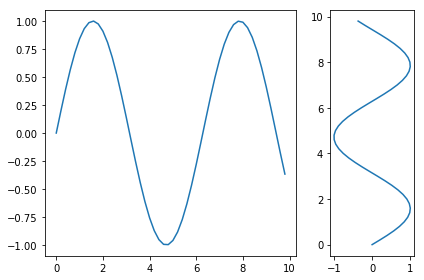

In [8]:
# generate some data
x = np.arange(0, 10, 0.2)
y = np.sin(x)

# plot it
f, (a0, a1) = plt.subplots(1,2, gridspec_kw = {'width_ratios':[3, 1]})
a0.plot(x,y)
a1.plot(y,x)

f.tight_layout()

In [9]:
img = np.random.random((100, 100))

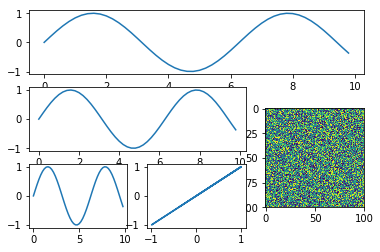

In [10]:
gs = gridspec.GridSpec(3, 3)
ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1, :-1])
ax3 = plt.subplot(gs[1:, -1])
ax4 = plt.subplot(gs[-1, 0])
ax5 = plt.subplot(gs[-1, -2])
ax1.plot(x, y)
ax2.plot(x, y)
#ax3.plot(x, y)
ax3.imshow(img)
ax4.plot(x, y)
ax5.plot(y, y)

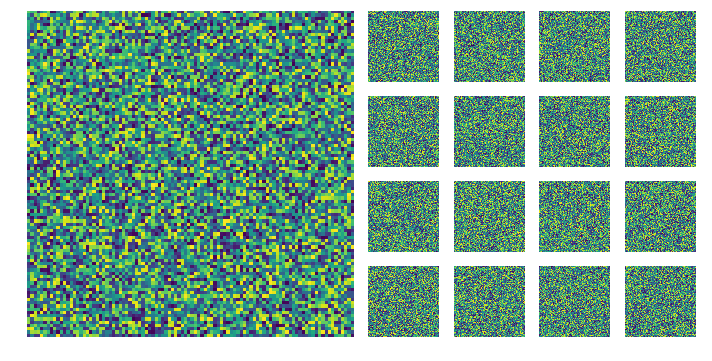

In [11]:
plt.figure(figsize = (12, 6))
gs = gridspec.GridSpec(4, 8)
ax_big = plt.subplot(gs[:, :-4])
ax_big.axis('off')
ax_grid = [[plt.subplot(gs[i, j]) for j in range(4, 8)] for i in range(4)]
ax_big.imshow(np.random.random((100, 100)))
for ax_line in ax_grid:
    for ax_cell in ax_line:
        ax_cell.imshow(np.random.random((100, 100)))
        ax_cell.axis('off')